## Insurance Dataset Analysis

---

### 🔎 Data Analysis Questions (Medical Insurance Dataset)

1. **Basic Stats**

   * What are the mean, median, and standard deviation of `charges`?

2. **Age Effect**

   * How do average `charges` vary with `age` groups (e.g., <30, 30–50, >50)?

3. **Gender Difference**

   * Do `male` and `female` have significantly different average `charges`?

4. **Smoker Impact**

   * What is the difference in `charges` between `smoker` and `non-smoker` groups?

5. **BMI Influence**

   * Is there a correlation between `bmi` and `charges`?

6. **Children Factor**

   * How do `charges` vary with the number of `children`? Do people with more children pay more?

7. **Regional Variation**

   * Which `region` has the highest average `charges`?

8. **Smoker + BMI Interaction**

   * Among smokers, do people with higher `bmi` tend to pay more in `charges`?

9. **Age vs. Charges by Smoking Status**

   * Do `smokers` show a stronger increase in `charges` with `age` compared to `non-smokers`?

10. **Outlier Detection**

* Are there extreme outliers in `charges` (e.g., very high medical bills)?

---



In [51]:
import numpy as np
import pandas as pd

In [127]:
data = pd.read_csv("/Users/rohanpatil/Desktop/Rohan Patil - DSAI/Course Notebooks/projects/insurance/insurance.csv")

In [53]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [59]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
def age_group(age):
    if age < 30:
        return '<30'
    elif age >=30 and age < 50:
        return '30-50'
    else:
        return '>=50'

In [65]:
data['age_group'] = data['age'].apply(age_group)

In [66]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,<30
1,18,male,33.770,1,no,southeast,1725.55230,<30
2,28,male,33.000,3,no,southeast,4449.46200,<30
3,33,male,22.705,0,no,northwest,21984.47061,30-50
4,32,male,28.880,0,no,northwest,3866.85520,30-50


<Axes: xlabel='age_group'>

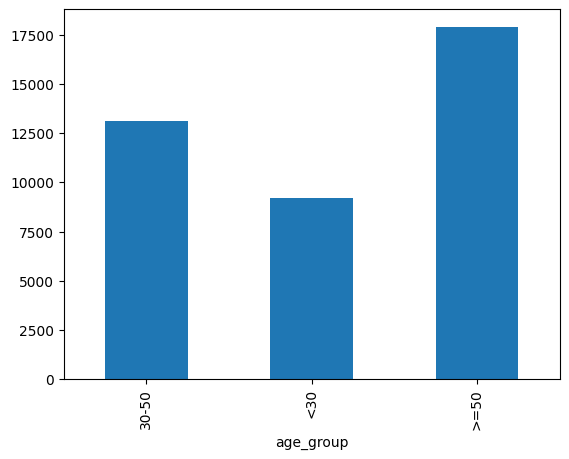

In [68]:
data.groupby(['age_group'])['charges'].mean().plot(kind='bar')

## 3. Male and Female charges difference

In [69]:
data.groupby(['sex'])['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [71]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [72]:
data.groupby(['smoker'])['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [78]:
data[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


<Axes: xlabel='children'>

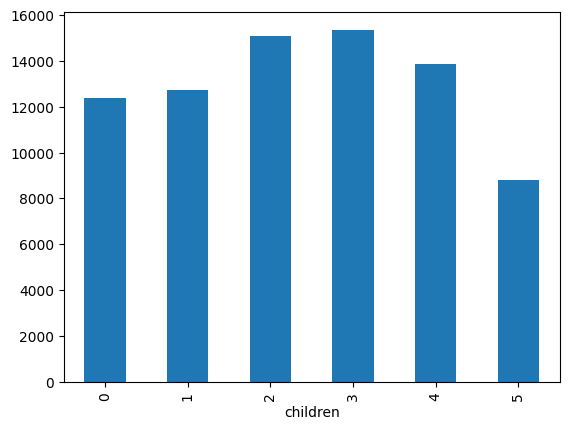

In [88]:
data.groupby(['children'])['charges'].mean().plot(kind='bar')

In [89]:
data.groupby(['region'])['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [91]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,<30
1,18,male,33.770,1,no,southeast,1725.55230,<30
2,28,male,33.000,3,no,southeast,4449.46200,<30
3,33,male,22.705,0,no,northwest,21984.47061,30-50
4,32,male,28.880,0,no,northwest,3866.85520,30-50


In [ ]:
data.groupby(['smoker', 'region'])

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [93]:
data.groupby(['smoker'])[['bmi','charges']].mean()

,bmi,charges
smoker,,
no,30.651795,8434.268298
yes,30.708449,32050.231832


In [ ]:
df = data[data['smoker'] == 'yes'] # filtering 

In [100]:
df[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


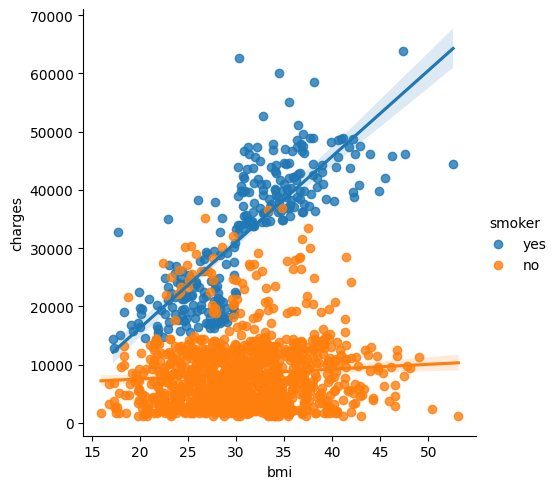

In [102]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data)

In [ ]:
# Do `smokers` show a stronger increase in `charges` with `age` compared to `non-smokers`?

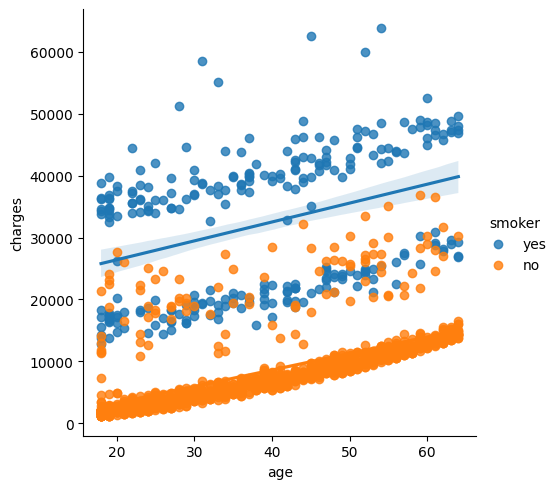

In [103]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data)

In [104]:
data.groupby(['smoker'])[['age','charges']].mean()

,age,charges
smoker,,
no,39.385338,8434.268298
yes,38.514599,32050.231832


In [107]:
data[data['smoker'] == 'yes'][['age','charges']].corr()

,age,charges
age,1.000000,0.368224
charges,0.368224,1.000000


In [108]:
data[data['smoker'] == 'no'][['age','charges']].corr()

,age,charges
age,1.000000,0.627947
charges,0.627947,1.000000


In [ ]:
## 2K,1K ,50K , 60K , 100K , 5000K=> 70K, 2605K

In [110]:
(210 + 5000)/2

2605.0

<Axes: >

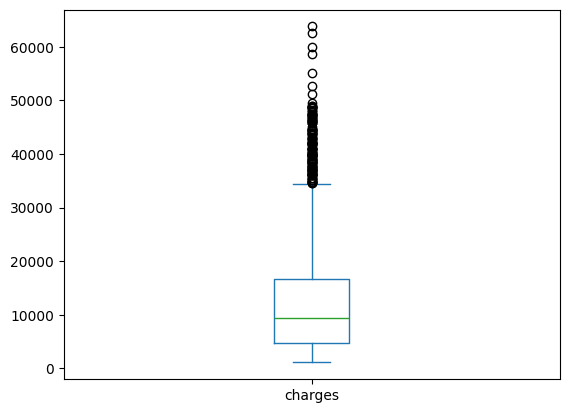

In [116]:
data['charges'].plot(kind='box')

<Axes: >

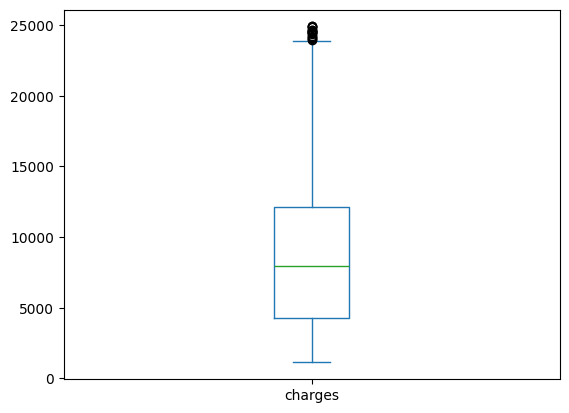

In [121]:
data[data['charges'] < 25000]['charges'].plot(kind='box')

In [117]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [113]:
data['charges'].median()

9382.033

In [128]:
import numpy as np
import pandas as pd

# Sample data
data = data['charges']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

print(Q1)
print(Q3)
# Calculate IQR
IQR = Q3 - Q1
print(IQR)

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'lower bound',lower_bound)
print(f'upper bound',upper_bound)


# Filter out outliers
data_no_outliers_iqr = data[(data >= lower_bound) & (data <= upper_bound)]

print("Original data:", data.tolist())
print("Data after IQR outlier removal:", data_no_outliers_iqr.tolist())


4740.28715
16639.912515
11899.625365
lower bound -13109.1508975
upper bound 34489.350562499996
Original data: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 7281.5056, 6406.4107, 28923.13692, 2721.3208, 27808.7251, 1826.843, 11090.7178, 39611.7577, 1837.237, 10797.3362, 2395.17155, 10602.385, 36837.467, 13228.84695, 4149.736, 1137.011, 37701.8768, 6203.90175, 14001.1338, 14451.83515, 12268.63225, 2775.19215, 38711.0, 35585.576, 2198.18985, 4687.797, 13770.0979, 51194.55914, 1625.43375, 15612.19335, 2302.3, 39774.2763, 48173.361, 3046.062, 4949.7587, 6272.4772, 6313.759, 6079.6715, 20630.28351, 3393.35635, 3556.9223, 12629.8967, 38709.176, 2211.13075, 3579.8287, 23568.272, 37742.5757, 8059.6791, 47496.49445, 13607.36875, 34303.1672, 23244.7902, 5989.52365, 8606.2174, 4504.6624, 30166.61817, 4133.64165, 14711.7438, 1743.214, 14235.072, 6389.37785, 5920.1041, 17663.1442, 16577.7795, 6799.458, 11741.726, 11946.6259, 7726.854, 11356.6609, 3947.4131, 1532.4697